# 서울시 cctv 데이터 EDA

In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [43]:
from matplotlib import rc

rc('font', family='AppleGothic')

In [2]:
cctv = pd.read_csv("../data_final/cctv_찐수정완료.csv")
cctv

,address,use_type,install_num,police_station_name,department_name,department_cd,national_police,city_name,county_name,town_name,x,y
0,시흥대로2길 8-49 주변 [시흥3동 978-6],방범,1,서울금천경찰서,서울금천,G30000001332675,서울청,서울,금천구,시흥동,126.903997,37.434221
1,시흥대로2길 8-49 주변 [시흥3동 978-6],방범,1,서울금천경찰서,서울금천,G30000001332675,서울청,서울,금천구,시흥동,126.903990,37.434303
2,시흥대로2길 8-49 주변 [시흥3동 978-6],방범,1,서울금천경찰서,서울금천,G30000001332675,서울청,서울,금천구,시흥동,126.904080,37.434312
3,시흥대로2길 8-49 주변 [시흥3동 978-6],방범,1,서울금천경찰서,서울금천,G30000001332675,서울청,서울,금천구,시흥동,126.903963,37.434383
4,내곡동 (신원동) 36-1,방범,1,서울서초경찰서,서울서초,G30000001329813,서울청,서울,서초구,신원동,127.069873,37.434617
...,...,...,...,...,...,...,...,...,...,...,...,...
61511,도봉동 8번지 다락원체육공원,방범,2,서울도봉경찰서,서울도봉,G30000001329939,서울청,서울,도봉구,도봉동,127.046621,37.692401
61512,창포원로 45(도봉2동 8다락원 체육공원),방범,1,서울도봉경찰서,서울도봉,G30000001329939,서울청,서울,도봉구,도봉동,127.046621,37.692401
61513,창포원로 45(도봉2동 8다락원 체육공원),방범,1,서울도봉경찰서,서울도봉,G30000001329939,서울청,서울,도봉구,도봉동,127.047108,37.692464
61514,창포원로 45(도봉2동 8다락원 체육공원),방범,1,서울도봉경찰서,서울도봉,G30000001329939,서울청,서울,도봉구,도봉동,127.047000,37.692900


In [11]:
len(cctv["town_name"].unique())

456

In [3]:
cctv.head(2)

,address,use_type,install_num,police_station_name,department_name,department_cd,national_police,city_name,county_name,town_name,x,y
0,시흥대로2길 8-49 주변 [시흥3동 978-6],방범,1,서울금천경찰서,서울금천,G30000001332675,서울청,서울,금천구,시흥동,126.903997,37.434221
1,시흥대로2길 8-49 주변 [시흥3동 978-6],방범,1,서울금천경찰서,서울금천,G30000001332675,서울청,서울,금천구,시흥동,126.903990,37.434303


# cctv 데이터 EDA

## county_name 별 cctv 개수

<Axes: xlabel='county_name'>

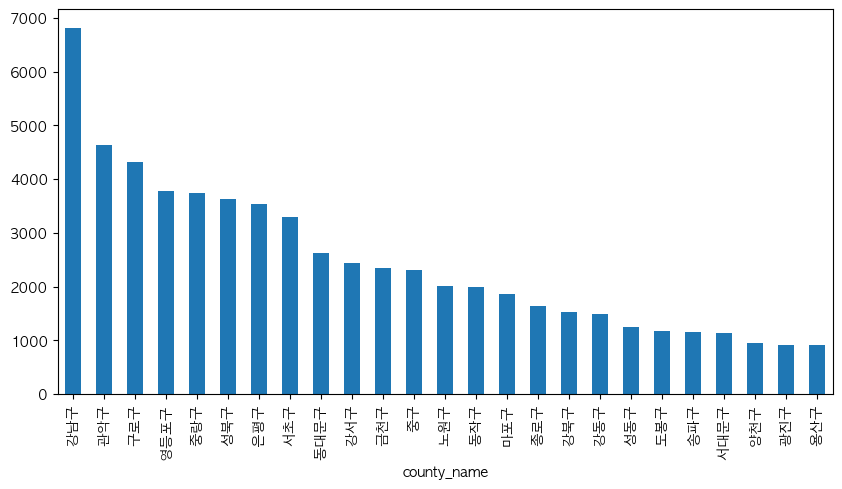

In [4]:
from matplotlib import rc

rc('font', family='AppleGothic')

plt.figure(figsize=(10, 5))
cctv.groupby("county_name")["install_num"].count().sort_values(ascending=False).plot(kind="bar")

## town_name 별 cctv 개수

In [6]:
cctv.groupby(["county_name", "town_name"])["install_num"].sum()

county_name  town_name
강남구          개포동           719
             논현동           972
             대치동           819
             도곡동           420
             삼성동           697
                          ... 
중랑구          면목동          1606
             묵동            454
             상봉동           415
             신내동           277
             중화동           434
Name: install_num, Length: 506, dtype: int64

<Axes: xlabel='town_name'>

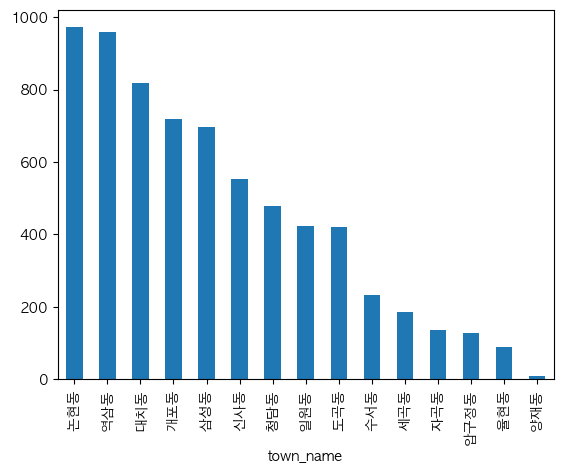

In [7]:
cctv[cctv["county_name"]=="강남구"].groupby("town_name")["install_num"].sum().sort_values(ascending=False).plot(kind="bar")

### 전체 구 -> 동별 cctv 개수 돌리기

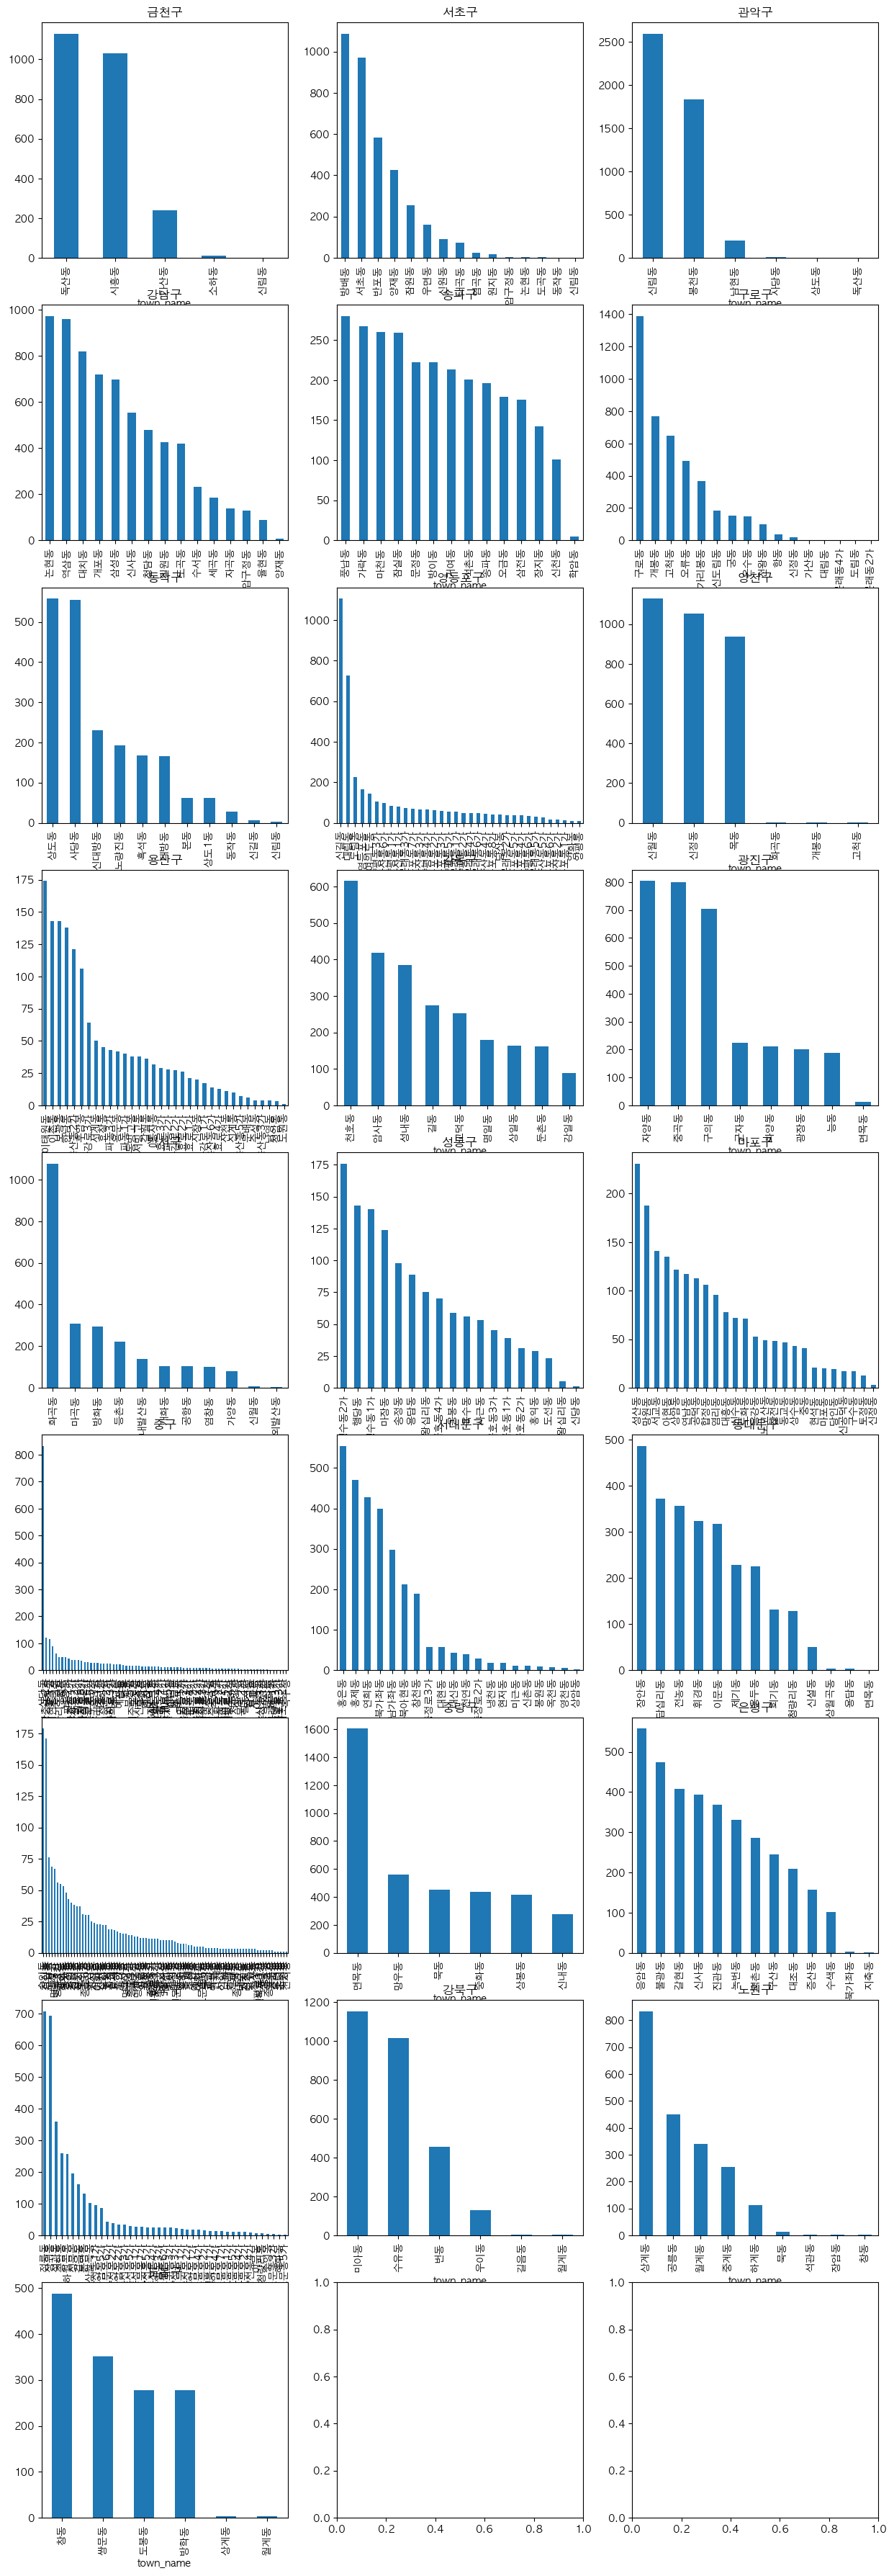

In [9]:
# 각 county_name에 대한 subplot을 만듭니다.
counties = cctv["county_name"].unique()
num_counties = len(counties)
num_rows = int(np.ceil(num_counties / 3))
num_cols = min(num_counties, 3)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, county in enumerate(counties):
    row = i // num_cols
    col = i % num_cols
    
    # 해당 county_name에 해당하는 데이터를 추출합니다.
    data = cctv[cctv["county_name"] == county].groupby("town_name")["install_num"].sum().sort_values(ascending=False)
    
    # subplot에 bar plot을 그립니다.
    ax = axes[row, col] if num_counties > 1 else axes
    data.plot(kind="bar", ax=ax)
    ax.set_title(county)

# 쿼리 연결
### python에서 BigQuery 연결

In [12]:
!pip install google-cloud-bigquery google-auth db-dtypes

In [3]:
from google.oauth2 import service_account

credentials = service_account.Credentials.from_service_account_file("./data/key.json")

In [4]:
from google.cloud import bigquery

client = bigquery.Client(
    credentials=credentials,
    project=credentials.project_id
)

In [65]:
cctv_area = '''
SELECT 
  cctv.county_name,
  cctv.town_name,
  area.Subtotal,
  sum(cctv.install_num) as num_cnt
FROM 
  `my-fantazip.fantazip.town_area_final` as area
inner join
  `my-fantazip.fantazip.cctv` as cctv
on
  area.county_name = cctv.county_name and
  area.town_name = cctv.town_name
group by
  cctv.county_name,
  cctv.town_name,
  area.Subtotal
order by
  cctv.county_name
'''

In [66]:
cctv_area = client.query(cctv_area).to_dataframe()
cctv_area

,county_name,town_name,Subtotal,num_cnt
0,강남구,개포동,5424693.6,719
1,강남구,논현동,2717301.0,972
2,강남구,대치동,3791374.3,819
3,강남구,도곡동,2038231.2,420
4,강남구,삼성동,3193589.8,697
...,...,...,...,...
449,중랑구,망우동,3869313.3,562
450,중랑구,면목동,6028796.5,1606
451,중랑구,상봉동,1528221.3,415
452,중랑구,신내동,3514457.5,277


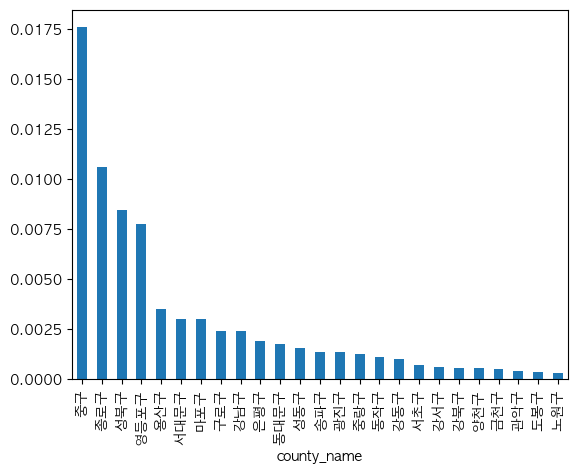

In [44]:
cctv_area['ratio'] = cctv_area['num_cnt'] / cctv_area['Subtotal']
county_ratio_sum = cctv_area.groupby('county_name')['ratio'].sum().sort_values(ascending=False)

# 바 그래프로 시각화합니다.
county_ratio_sum.plot(kind='bar')

plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='town_name'>

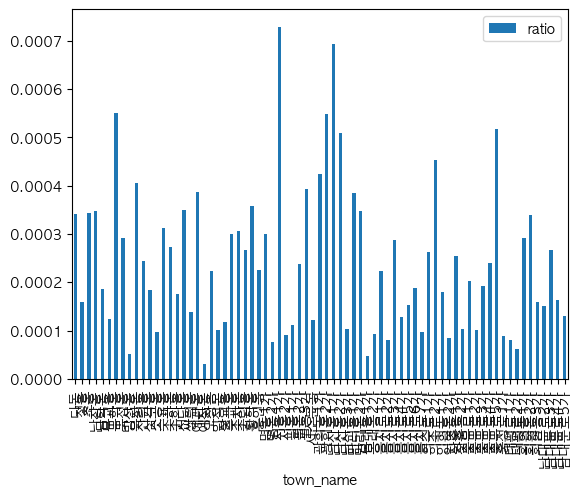

In [46]:
cctv_area[cctv_area["county_name"]=="중구"][["town_name", "ratio"]].plot(x="town_name", y="ratio", kind="bar")

<Axes: >

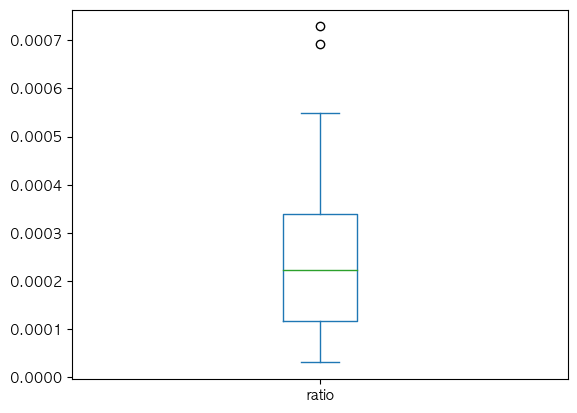

In [54]:
cctv_area[cctv_area["county_name"]=="중구"][["ratio"]].plot(kind="box")

In [49]:
len(cctv_area["county_name"].unique())

25

In [68]:
cctv_area['ratio'] = cctv_area['num_cnt'] / cctv_area['Subtotal'] * 1000000

In [69]:
cctv_area

,county_name,town_name,Subtotal,num_cnt,ratio
0,강남구,개포동,5424693.6,719,132.542048
1,강남구,논현동,2717301.0,972,357.707887
2,강남구,대치동,3791374.3,819,216.016657
3,강남구,도곡동,2038231.2,420,206.06102
4,강남구,삼성동,3193589.8,697,218.249695
...,...,...,...,...,...
449,중랑구,망우동,3869313.3,562,145.245411
450,중랑구,면목동,6028796.5,1606,266.388159
451,중랑구,상봉동,1528221.3,415,271.557529
452,중랑구,신내동,3514457.5,277,78.817285


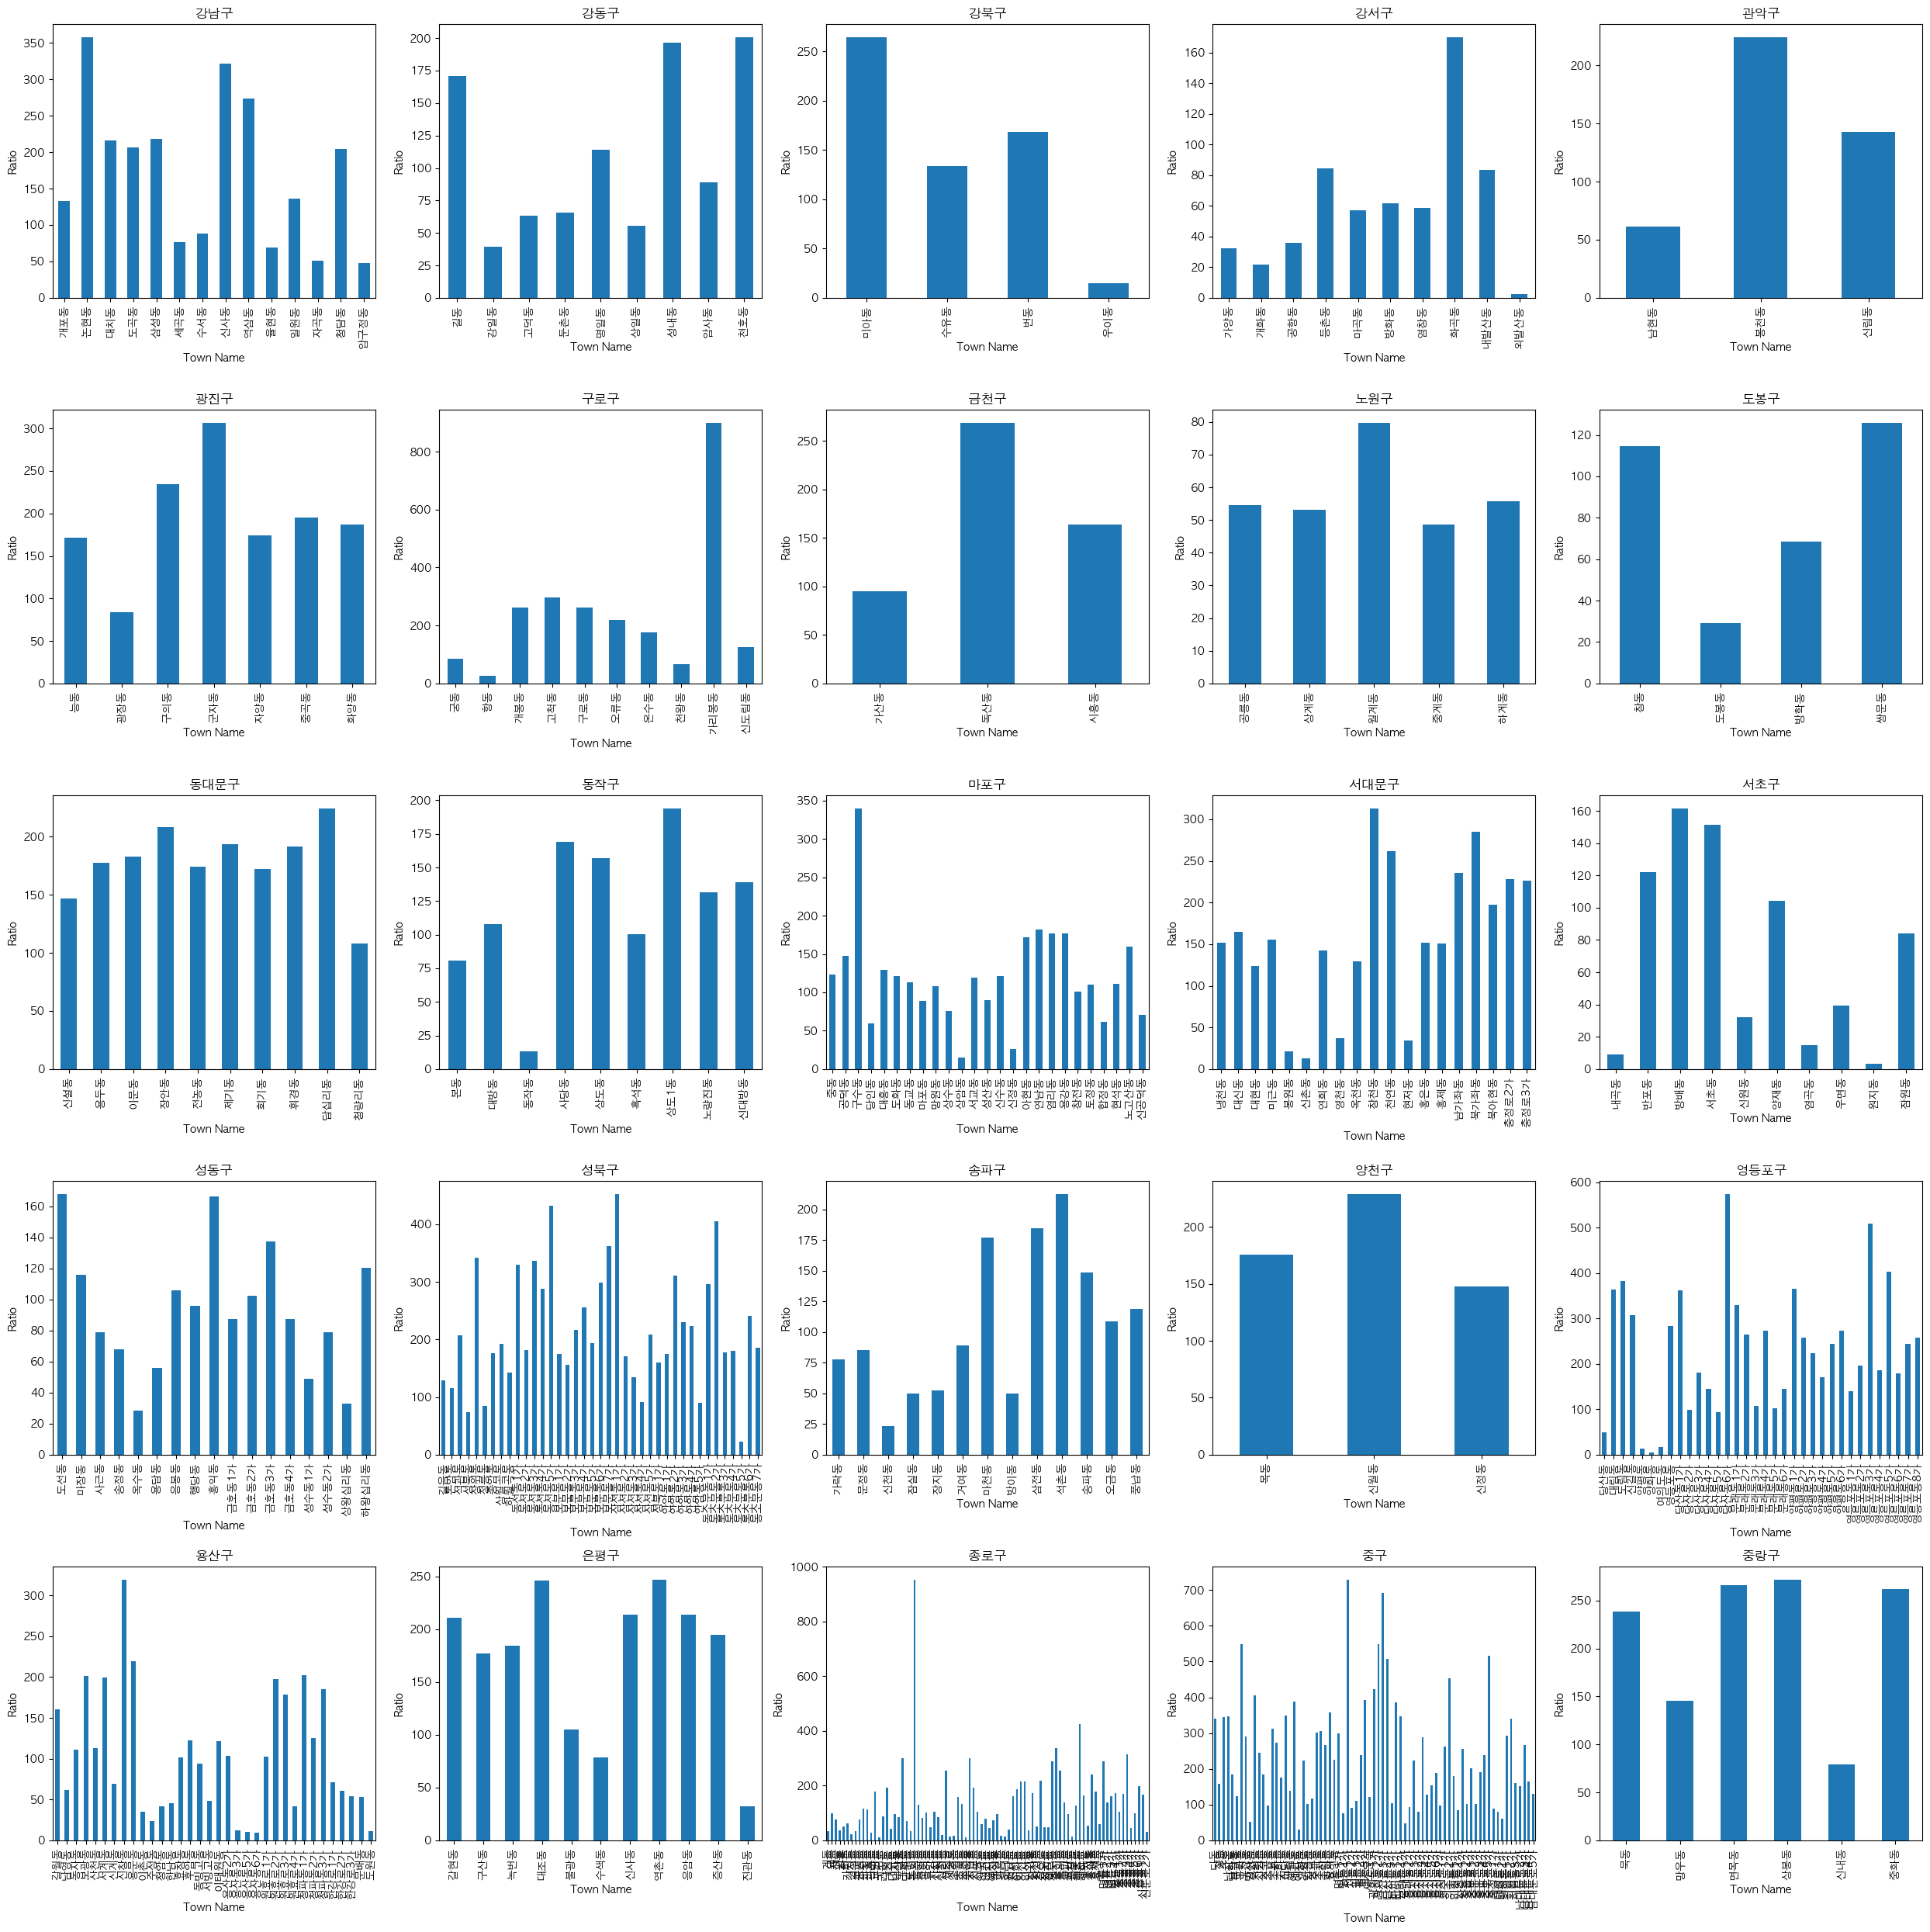

In [70]:
# "county_name"별로 서브플롯을 생성하여 각각의 "county_name"에 대한 "town_name"별 "ratio"를 나타내는 바 그래프를 그립니다.
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(25, 25))
counties = cctv_area['county_name'].unique()

for i, county in enumerate(counties):
    ax = axes[i//5, i%5]
    county_data = cctv_area[cctv_area['county_name'] == county]
    county_data.plot(ax=ax, x='town_name', y='ratio', kind='bar', title=county, legend=False)
    ax.set_xlabel('Town Name')
    ax.set_ylabel('Ratio')
    ax.set_xticklabels(county_data['town_name'])
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

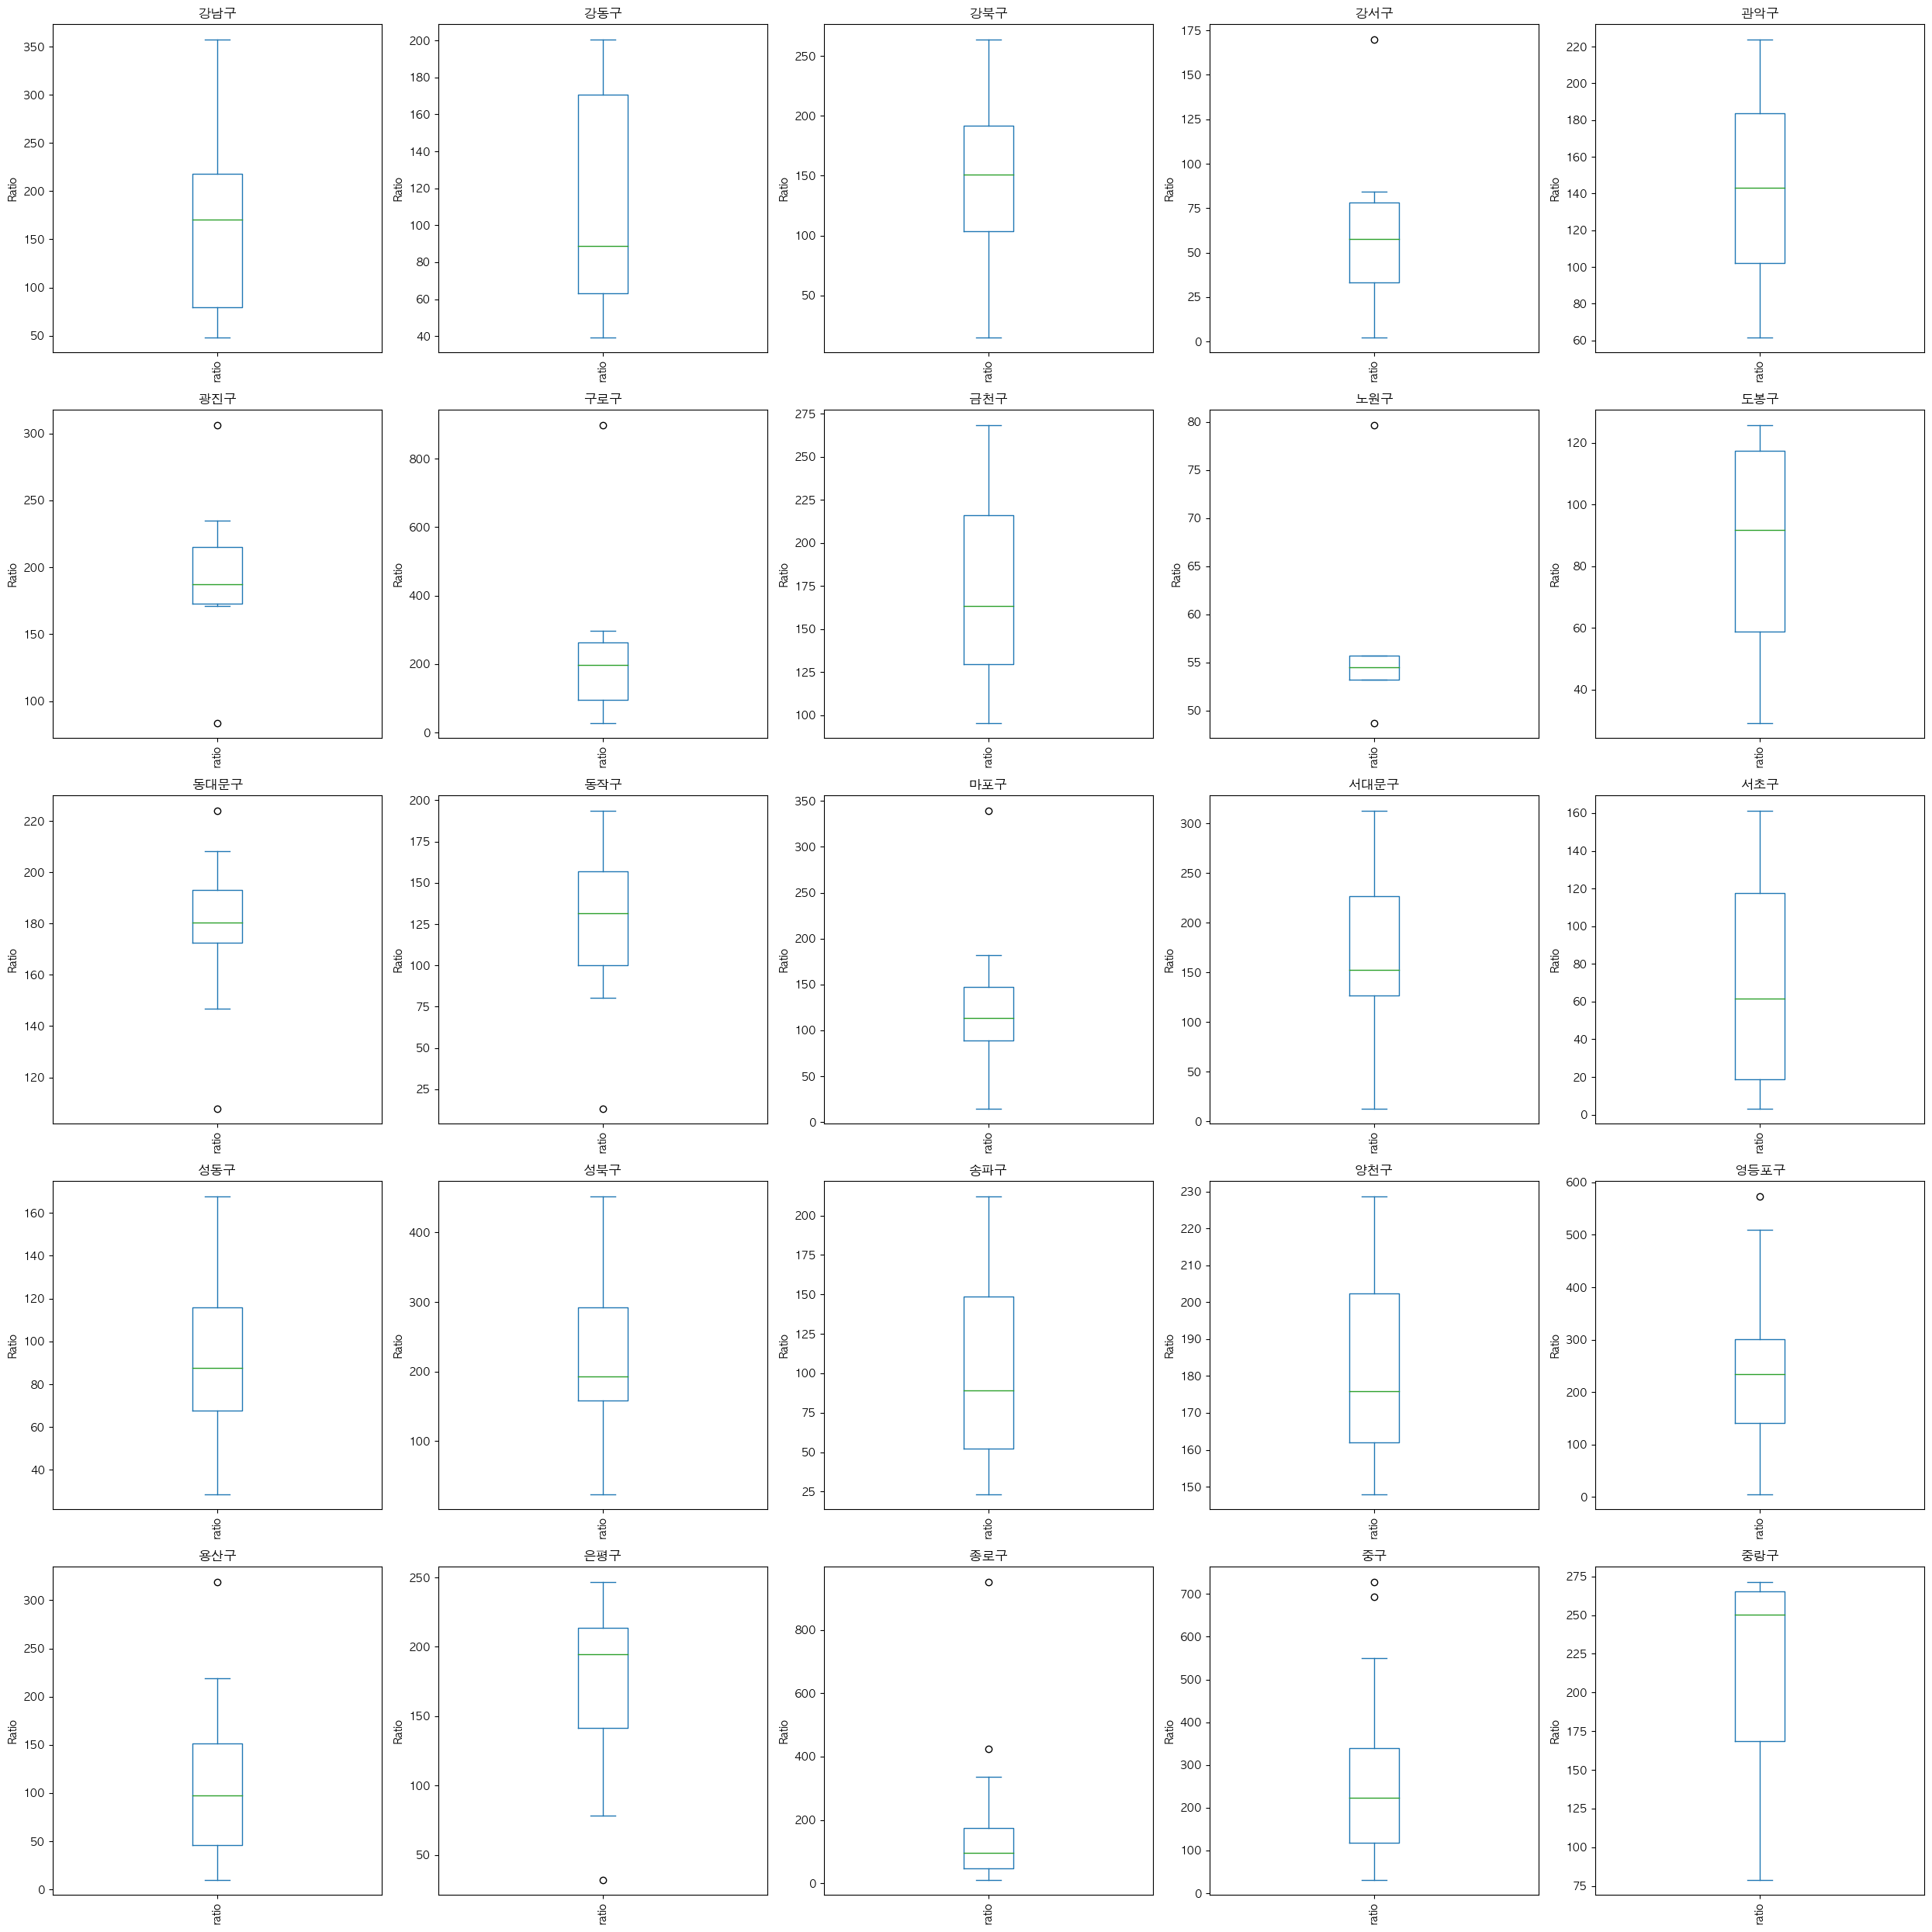

In [71]:
# "county_name"별로 서브플롯을 생성하여 각각의 "county_name"에 대한 "town_name"별 "ratio"를 나타내는 바 그래프를 그립니다.
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(25, 25))
counties = cctv_area['county_name'].unique()

for i, county in enumerate(counties):
    ax = axes[i//5, i%5]
    county_data = cctv_area[cctv_area['county_name'] == county]
    county_data["ratio"].plot(ax=ax, kind='box', title=county, legend=False)
    # cctv_area[cctv_area["county_name"]=="중구"][["ratio"]].plot(kind="box")
    ax.set_ylabel('Ratio')
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [104]:
county_cnt = cctv_area.groupby("county_name")["num_cnt"].sum().reset_index(name="cctv_cnt")
county_cnt

,county_name,cctv_cnt
0,강남구,6814
1,강동구,2541
2,강북구,2757
3,강서구,2431
4,관악구,4624
5,광진구,3134
6,구로구,4290
7,금천구,2400
8,노원구,1991
9,도봉구,1395


In [116]:
town_cnt = cctv_area.groupby('town_name')["num_cnt"].sum().reset_index(name='cctv_cnt')
town_cnt

,town_name,cctv_cnt
0,가락동,267
1,가리봉동,367
2,가산동,240
3,가양동,80
4,가회동,10
...,...,...
447,후암동,106
448,훈정동,12
449,휘경동,323
450,흑석동,167


In [117]:
area = cctv_area.groupby("town_name")["Subtotal"].sum().reset_index(name="total_area")
area

,town_name,total_area
0,가락동,3431874.4
1,가리봉동,408192.4
2,가산동,2516887.7
3,가양동,2462987.1
4,가회동,158099.4
...,...,...
447,후암동,865094.6
448,훈정동,206168.9
449,휘경동,1684177.3
450,흑석동,1666873.3


In [118]:
town_cnt["ratio"] = town_cnt["cctv_cnt"] / area["total_area"] * 1000000

In [119]:
town_cnt

,town_name,cctv_cnt,ratio
0,가락동,267,77.80005
1,가리봉동,367,899.085823
2,가산동,240,95.355864
3,가양동,80,32.480885
4,가회동,10,63.251347
...,...,...,...
447,후암동,106,122.529952
448,훈정동,12,58.204705
449,휘경동,323,191.785034
450,흑석동,167,100.187579


In [120]:
town_cnt.describe()

,cctv_cnt,ratio
count,452.0,452.0
mean,160.65708,163.284653
std,284.888175,123.770015
min,1.0,2.253134
25%,13.0,78.667247
50%,42.5,140.574704
75%,179.0,216.807901
max,2594.0,952.796612


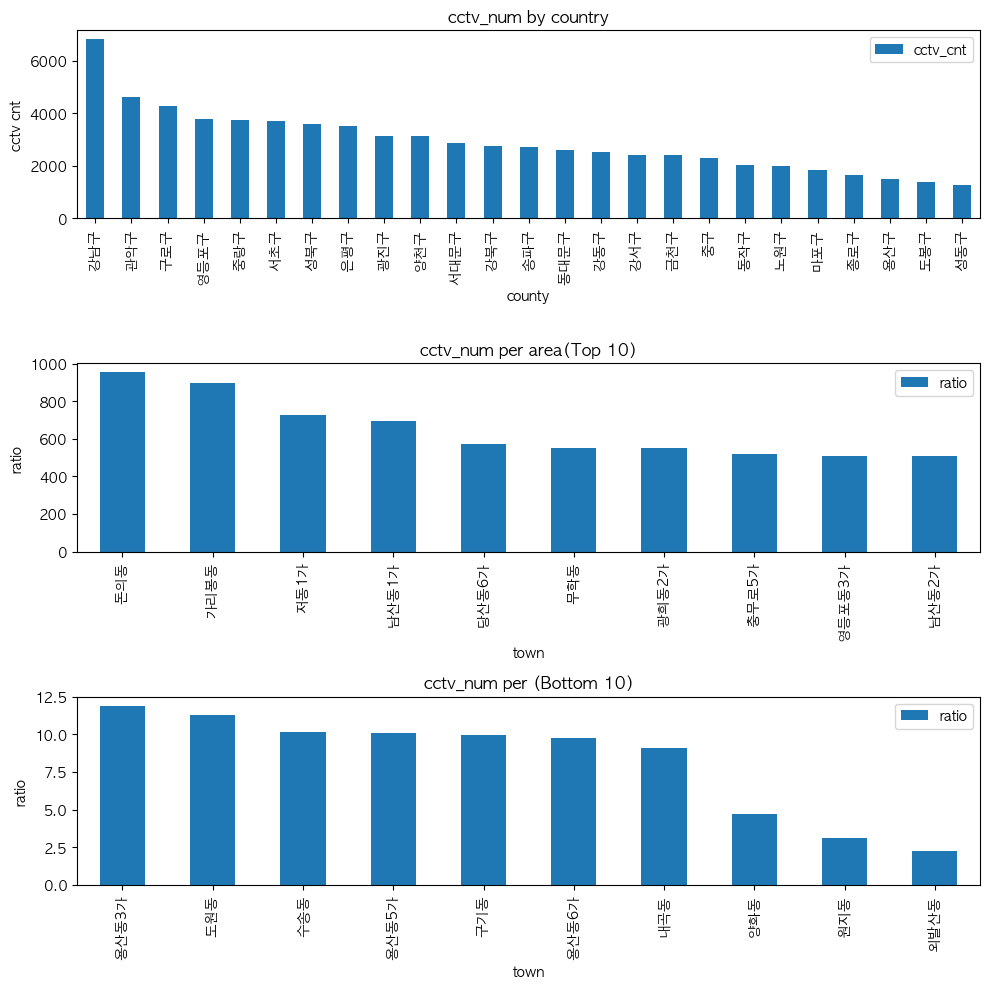

In [121]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
county_cnt.sort_values(by='cctv_cnt', ascending=False).plot(kind='bar', x='county_name', y='cctv_cnt', ax=axes[0])
axes[0].set_title('cctv_num by country')
axes[0].set_xlabel('county')
axes[0].set_ylabel('cctv cnt')

town_cnt.sort_values(by='ratio', ascending=False).head(10).plot(kind='bar', x='town_name', y='ratio', ax=axes[1])
axes[1].set_title('cctv_num per area(Top 10)')
axes[1].set_xlabel('town')
axes[1].set_ylabel('ratio')


town_cnt.sort_values(by='ratio', ascending=False).tail(10).plot(kind='bar', x='town_name', y='ratio', ax=axes[2])
axes[2].set_title('cctv_num per (Bottom 10)')
axes[2].set_xlabel('town')
axes[2].set_ylabel('ratio')

# town_counts.sort_values(by='museum_count', ascending=False).tail(10).plot(kind='bar', x='town_name', y='museum_count', ax=axes[2])
# axes[2].set_title('number of museums by town (Bottom 10)')
# axes[2].set_xlabel('town')
# axes[2].set_ylabel('museum cnt')

plt.tight_layout()
plt.show()


In [39]:
area[area["town_name"]=="c"]

,city_name,county_name,town_name,Subtotal,Field,Paddy,Orchard,Ranch,Forest,Mineral_Spring_Area,...,Reservoir,Fish_Farm,Waterworks_Site,Park,Sports_Site,Amusement_Park,Religious_Site,Historic_Site,Cemetery,Miscellaneous_Land


In [21]:
num_per_area = '''
SELECT 
  cctv.county_name,
  cctv.town_name,
  SUM(cctv.install_num) AS install_num_sum,
  area.Subtotal
FROM 
  `my-fantazip.fantazip.cctv` AS cctv
LEFT JOIN
  `my-fantazip.fantazip.town_area_final` AS area
ON
  cctv.county_name = area.county_name AND
  cctv.town_name = area.town_name
GROUP BY
  cctv.county_name,
  cctv.town_name,
  area.Subtotal
'''

In [22]:
num_per_area = client.query(num_per_area).to_dataframe()
num_per_area

,county_name,town_name,install_num_sum,Subtotal
0,송파구,가락동,267,3431874.4
1,노원구,공릉동,449,8237775.2
2,송파구,문정동,222,2608808.2
3,강북구,미아동,1155,4373864.4
4,강북구,수유동,1017,7629456.1
...,...,...,...,...
501,양천구,화곡동,3,NaN
502,노원구,묵동,13,NaN
503,노원구,석관동,3,NaN
504,동작구,신길동,6,NaN
